In [157]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Base path for devices used in all parts

In [158]:
data_file_path = './Data'

# Part A: Understand and Quantify Noise using Spectral Density via M2k and Scopy

## Parts required to include in Team Report

### COMPLETE
1) Prelab: Report on what "high" and "low" mean, in real values (not dB). What is the maximum voltage range at the input (not at the internal ADC) for each gain setting? Given that the M2k utilizes a 12 bit ADC, what input voltage does a single bit represent, for each setting? 

2) Devices under test are the 50 ohm termination cap on the M2k connected to Scopy. The spectrum analyzer is used. Save the spectra and plot. Report data 

For this part we used Exponential RMS, Blackman-Harris, and 100 averages

Start frequency 100 Hz; 

Stop frequency 1 MHz

We tested two different RBW values. 15.62 Hz and 61.04 Hz. Both cases showed Ch2 with a lower PSD

In [159]:
# Read in the data

m2k_50ohm_1562 = pd.read_csv(f'{data_file_path}/Part_A/15.62Hz_RBW_60s.csv')
m2k_50ohm_6104 = pd.read_csv(f'{data_file_path}/Part_A/61.04Hz_RBW_60s.csv')
print(m2k_50ohm_1562)
print(m2k_50ohm_6104)

       Sample  Frequency(Hz)  Amplitude CH1(V/rt(Hz))  Amplitude CH2(V/rt(Hz))
0           0         1.0000                 0.009697                 0.001243
1           1        15.2588                 0.009697                 0.001243
2           2        30.5176                 0.002807                 0.000360
3           3        45.7764                 0.000234                 0.000030
4           4        61.0352                 0.000028                 0.000003
...       ...            ...                      ...                      ...
65531   65531    999924.0000                 0.000014                 0.000001
65532   65532    999939.0000                 0.000013                 0.000001
65533   65533    999954.0000                 0.000013                 0.000001
65534   65534    999969.0000                 0.000013                 0.000001
65535   65535    999985.0000                 0.000013                 0.000002

[65536 rows x 4 columns]
       Sample  Frequency(H

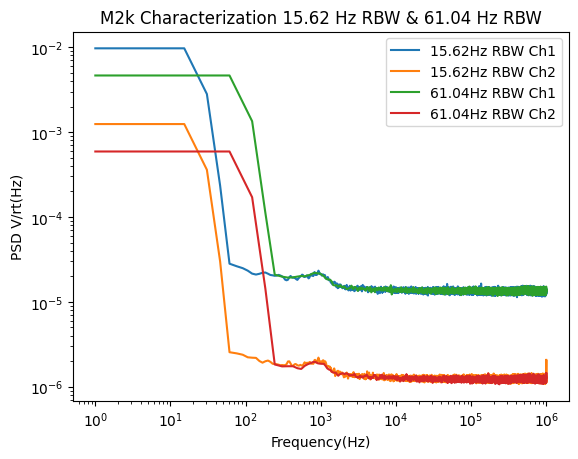

In [160]:
# Plot the data

plt.xscale('log')
plt.yscale('log')
plt.title('M2k Characterization 15.62 Hz RBW & 61.04 Hz RBW')
plt.ylabel('PSD V/rt(Hz)')
plt.xlabel('Frequency(Hz)')
plt.plot(m2k_50ohm_1562['Frequency(Hz)'], m2k_50ohm_1562['Amplitude CH1(V/rt(Hz))'], label='15.62Hz RBW Ch1')
plt.plot(m2k_50ohm_1562['Frequency(Hz)'], m2k_50ohm_1562['Amplitude CH2(V/rt(Hz))'], label='15.62Hz RBW Ch2')
plt.plot(m2k_50ohm_6104['Frequency(Hz)'], m2k_50ohm_6104['Amplitude CH1(V/rt(Hz))'], label='61.04Hz RBW Ch1')
plt.plot(m2k_50ohm_6104['Frequency(Hz)'], m2k_50ohm_6104['Amplitude CH2(V/rt(Hz))'], label='61.04Hz RBW Ch2')
plt.legend()
plt.show()

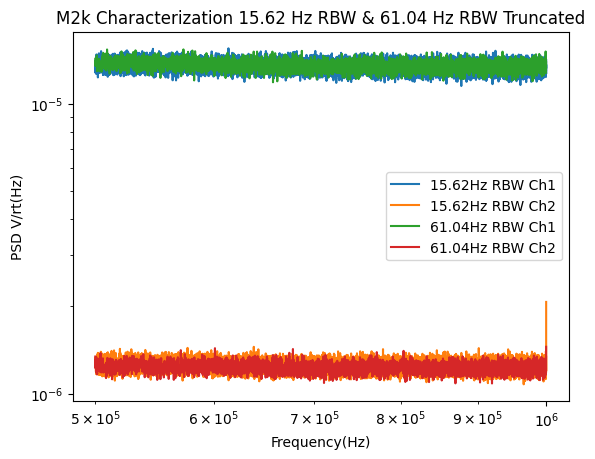

In [161]:
# Plot truncated data based on full graph above to show noise regions at higher frequencies
m2k_1562_len = len(m2k_50ohm_1562['Frequency(Hz)'])
m2k_6104_len = len(m2k_50ohm_6104['Frequency(Hz)'])

plt.xscale('log')
plt.yscale('log')
plt.title('M2k Characterization 15.62 Hz RBW & 61.04 Hz RBW Truncated')
plt.ylabel('PSD V/rt(Hz)')
plt.xlabel('Frequency(Hz)')
plt.plot(m2k_50ohm_1562['Frequency(Hz)'][m2k_1562_len//2:], m2k_50ohm_1562['Amplitude CH1(V/rt(Hz))'][m2k_1562_len//2:], label='15.62Hz RBW Ch1')
plt.plot(m2k_50ohm_1562['Frequency(Hz)'][m2k_1562_len//2:], m2k_50ohm_1562['Amplitude CH2(V/rt(Hz))'][m2k_1562_len//2:], label='15.62Hz RBW Ch2')
plt.plot(m2k_50ohm_6104['Frequency(Hz)'][m2k_6104_len//2:], m2k_50ohm_6104['Amplitude CH1(V/rt(Hz))'][m2k_6104_len//2:], label='61.04Hz RBW Ch1')
plt.plot(m2k_50ohm_6104['Frequency(Hz)'][m2k_6104_len//2:], m2k_50ohm_6104['Amplitude CH2(V/rt(Hz))'][m2k_6104_len//2:], label='61.04Hz RBW Ch2')
plt.legend()
plt.show()

In [162]:
# Average the PSD for the above regions
m2k_50ohm_1562_ch1avg = np.mean(m2k_50ohm_1562['Amplitude CH1(V/rt(Hz))'][m2k_1562_len//2:])
m2k_50ohm_1562_ch2avg = np.mean(m2k_50ohm_1562['Amplitude CH2(V/rt(Hz))'][m2k_1562_len//2:])

m2k_50ohm_6104_ch1avg = np.mean(m2k_50ohm_6104['Amplitude CH1(V/rt(Hz))'][m2k_6104_len//2:])
m2k_50ohm_6104_ch2avg = np.mean(m2k_50ohm_6104['Amplitude CH2(V/rt(Hz))'][m2k_6104_len//2:])

print(f'M2k 15.62Hz RBW Ch1 Average: {m2k_50ohm_1562_ch1avg:.6E} V/rt(Hz)')
print(f'M2k 15.62Hz RBW Ch2 Average: {m2k_50ohm_1562_ch2avg:.6E} V/rt(Hz)')
print()
print(f'M2k 61.04Hz RBW Ch1 Average: {m2k_50ohm_1562_ch1avg:.6E} V/rt(Hz)')
print(f'M2k 61.04Hz RBW Ch2 Average: {m2k_50ohm_1562_ch2avg:.6E} V/rt(Hz)')

M2k 15.62Hz RBW Ch1 Average: 1.347044E-05 V/rt(Hz)
M2k 15.62Hz RBW Ch2 Average: 1.248568E-06 V/rt(Hz)

M2k 61.04Hz RBW Ch1 Average: 1.347044E-05 V/rt(Hz)
M2k 61.04Hz RBW Ch2 Average: 1.248568E-06 V/rt(Hz)


# Part B: Intrinsic Performance of Cascaded Amplifiers

## Parts required to include in the Team Report

### PLOTS AND AVERAGES COMPLETE; QUESTIONS AND TABLE NEED COMPLETION
2) Measure the noise spectrum of both channels. Take the average of your saved data over a reasonable frequency range (where the data is reasonably independent of frequency). What is that value for each channel? Based on your prelab table, for which values of gain will the SR560 noise exceed the base noise (or noise floor) of the M2k?

### COMPLETE
1) Prelab: Tabulate the "Input Noise" which is really the noise at the output divided by the gain. This is the referred to input. Make your own table of this information (low noise rows only) and replace the final "Maximum DR" column with one containing the expected actual "Output Noise" for each gain. That is, your table consists of noise referred to input AND referred to output

3) Measure the spectra for gains calculated up to maximum gain. Take average of saved data over reasonable frequency range. Plot the measured noise and expected noise ("output noise" from your table) vs gain for all values of gain you were able to test. Convert the measured noise to input referred noise by dividing by gain. Make a second plot of the measured and tabulated input referred noise vs gain. These plots are not frequency plots; the horizontal axis will be gain and the vertical axis will be noise (of the appropriate type)

## For each trial we used 

Exponential RMS

Blackman-Harris

500 Averages

Channel 2

RBW: 24.41 Hz

In [163]:
# Read in CSV for step 2 of Part B: This is how we chose channel 2

m2k_channel_comp = pd.read_csv(f'{data_file_path}/Part_B/4b_Channel_Comp.csv')
print(m2k_channel_comp)

      Sample  Frequency(Hz)  Amplitude CH1(V/rt(Hz))  Amplitude CH2(V/rt(Hz))
0          0         1.0000                 0.000684                 0.000569
1          1        24.4141                 0.000684                 0.000569
2          2        48.8281                 0.000198                 0.000165
3          3        73.2422                 0.000017                 0.000015
4          4        97.6563                 0.000005                 0.000005
...      ...            ...                      ...                      ...
4091    4091     99877.9000                 0.000004                 0.000004
4092    4092     99902.3000                 0.000004                 0.000004
4093    4093     99926.8000                 0.000004                 0.000004
4094    4094     99951.2000                 0.000004                 0.000004
4095    4095     99975.6000                 0.000004                 0.000004

[4096 rows x 4 columns]


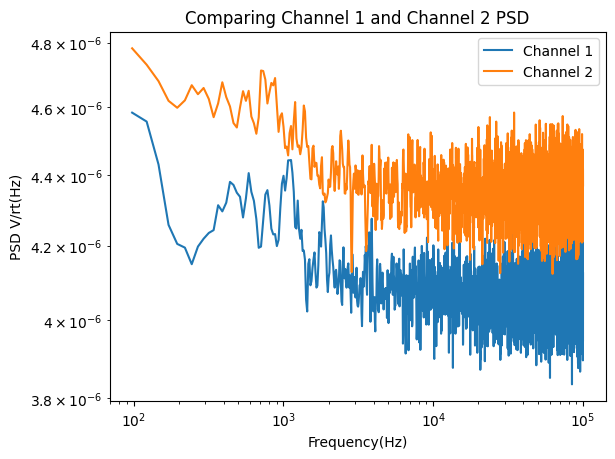

In [164]:
# This shows the full PSD for each channel 1 and channel 2

plt.xscale('log')
plt.yscale('log')
plt.title('Comparing Channel 1 and Channel 2 PSD')
plt.xlabel('Frequency(Hz)')
plt.ylabel('PSD V/rt(Hz)')
plt.plot(m2k_channel_comp['Frequency(Hz)'][4:], m2k_channel_comp['Amplitude CH1(V/rt(Hz))'][4:], label='Channel 1')
plt.plot(m2k_channel_comp['Frequency(Hz)'][4:], m2k_channel_comp['Amplitude CH2(V/rt(Hz))'][4:], label='Channel 2')
plt.legend()
plt.show()

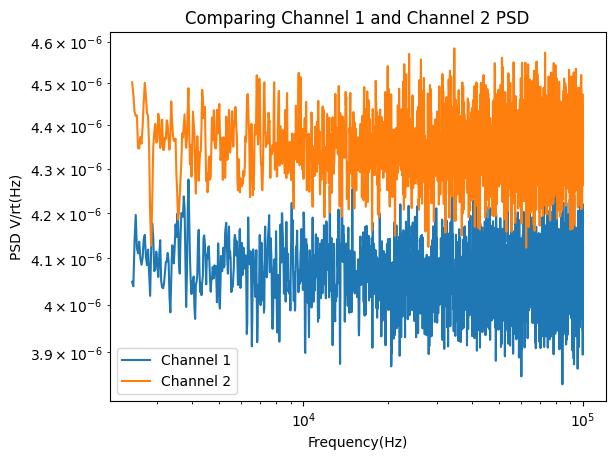

In [165]:
# This plots the lower, noiser region from the plot above, this range will be used to average the PSD for both channels

plt.xscale('log')
plt.yscale('log')
plt.title('Comparing Channel 1 and Channel 2 PSD')
plt.xlabel('Frequency(Hz)')
plt.ylabel('PSD V/rt(Hz)')
plt.plot(m2k_channel_comp['Frequency(Hz)'][100:], m2k_channel_comp['Amplitude CH1(V/rt(Hz))'][100:], label='Channel 1')
plt.plot(m2k_channel_comp['Frequency(Hz)'][100:], m2k_channel_comp['Amplitude CH2(V/rt(Hz))'][100:], label='Channel 2')
plt.legend()
plt.show()

In [166]:
# Average the PSD for channel 1 and channel 2

ch1_avg = np.mean(m2k_channel_comp['Amplitude CH1(V/rt(Hz))'][100:])
ch2_avg = np.mean(m2k_channel_comp['Amplitude CH2(V/rt(Hz))'][100:])
print(f'Channel 1 Avg PSD: {ch1_avg:.6E} V/rt(Hz)')
print(f'Channel 2 Avg PSD: {ch2_avg:.6E} V/rt(Hz)')

Channel 1 Avg PSD: 4.060782E-06 V/rt(Hz)
Channel 2 Avg PSD: 4.348867E-06 V/rt(Hz)


['Run1_100Gain_Ch1_1Plus.csv', 'Run2_200Gain_Ch1_1Plus.csv', 'Run3_500Gain_Ch1_1Plus.csv', 'Run4_1000Gain_Ch1_1Plus.csv', 'Run5_2000Gain_Ch1_1Plus.csv', 'Run6_5000Gain_Ch1_1Plus.csv', 'Run7_10000Gain_Ch1_1Plus.csv', 'Run8_20000Gain_Ch1_1Plus.csv', 'Run9_50000Gain_Ch1_1Plus.csv']
['100Gain', '200Gain', '500Gain', '1000Gain', '2000Gain', '5000Gain', '10000Gain', '20000Gain', '50000Gain']
      Sample  Frequency(Hz)  Amplitude CH1(V/rt(Hz))  Amplitude CH2(V/rt(Hz))
0          0         1.0000                 0.000081                 0.000695
1          1        24.4141                 0.000081                 0.000695
2          2        48.8281                 0.000024                 0.000201
3          3        73.2422                 0.000006                 0.000017
4          4        97.6563                 0.000006                 0.000004
...      ...            ...                      ...                      ...
4091    4091     99877.9000                 0.000005             

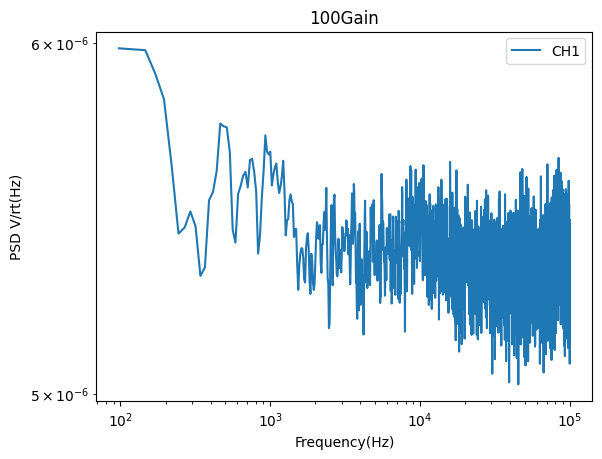

      Sample  Frequency(Hz)  Amplitude CH1(V/rt(Hz))  Amplitude CH2(V/rt(Hz))
0          0         1.0000                 0.000066                 0.000713
1          1        24.4141                 0.000066                 0.000713
2          2        48.8281                 0.000020                 0.000206
3          3        73.2422                 0.000007                 0.000018
4          4        97.6563                 0.000007                 0.000004
...      ...            ...                      ...                      ...
4091    4091     99877.9000                 0.000006                 0.000004
4092    4092     99902.3000                 0.000006                 0.000004
4093    4093     99926.8000                 0.000006                 0.000004
4094    4094     99951.2000                 0.000006                 0.000004
4095    4095     99975.6000                 0.000006                 0.000004

[4096 rows x 4 columns]


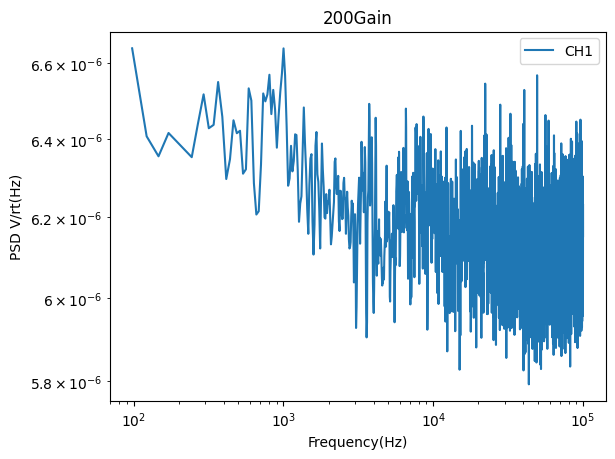

      Sample  Frequency(Hz)  Amplitude CH1(V/rt(Hz))  Amplitude CH2(V/rt(Hz))
0          0         1.0000                 0.000868                 0.000707
1          1        24.4141                 0.000868                 0.000707
2          2        48.8281                 0.000251                 0.000205
3          3        73.2422                 0.000022                 0.000017
4          4        97.6563                 0.000008                 0.000004
...      ...            ...                      ...                      ...
4091    4091     99877.9000                 0.000008                 0.000004
4092    4092     99902.3000                 0.000008                 0.000004
4093    4093     99926.8000                 0.000008                 0.000004
4094    4094     99951.2000                 0.000008                 0.000004
4095    4095     99975.6000                 0.000008                 0.000004

[4096 rows x 4 columns]


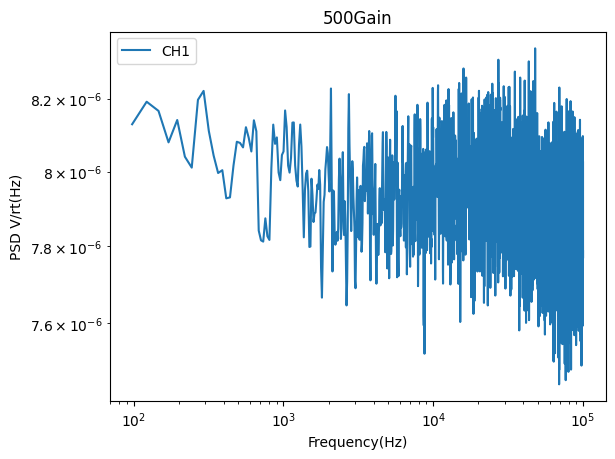

      Sample  Frequency(Hz)  Amplitude CH1(V/rt(Hz))  Amplitude CH2(V/rt(Hz))
0          0         1.0000                 0.002347                 0.000706
1          1        24.4141                 0.002347                 0.000706
2          2        48.8281                 0.000679                 0.000205
3          3        73.2422                 0.000058                 0.000018
4          4        97.6563                 0.000017                 0.000004
...      ...            ...                      ...                      ...
4091    4091     99877.9000                 0.000016                 0.000004
4092    4092     99902.3000                 0.000015                 0.000004
4093    4093     99926.8000                 0.000015                 0.000004
4094    4094     99951.2000                 0.000016                 0.000004
4095    4095     99975.6000                 0.000016                 0.000004

[4096 rows x 4 columns]


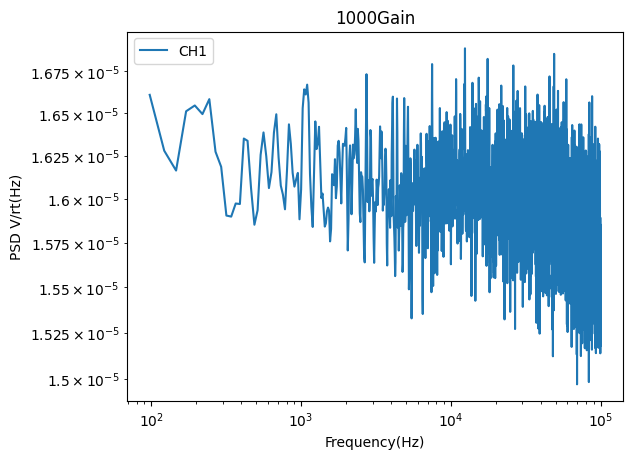

      Sample  Frequency(Hz)  Amplitude CH1(V/rt(Hz))  Amplitude CH2(V/rt(Hz))
0          0         1.0000                 0.007116                 0.000700
1          1        24.4141                 0.007116                 0.000700
2          2        48.8281                 0.002060                 0.000203
3          3        73.2422                 0.000173                 0.000017
4          4        97.6563                 0.000028                 0.000004
...      ...            ...                      ...                      ...
4091    4091     99877.9000                 0.000027                 0.000004
4092    4092     99902.3000                 0.000027                 0.000004
4093    4093     99926.8000                 0.000027                 0.000004
4094    4094     99951.2000                 0.000027                 0.000004
4095    4095     99975.6000                 0.000027                 0.000004

[4096 rows x 4 columns]


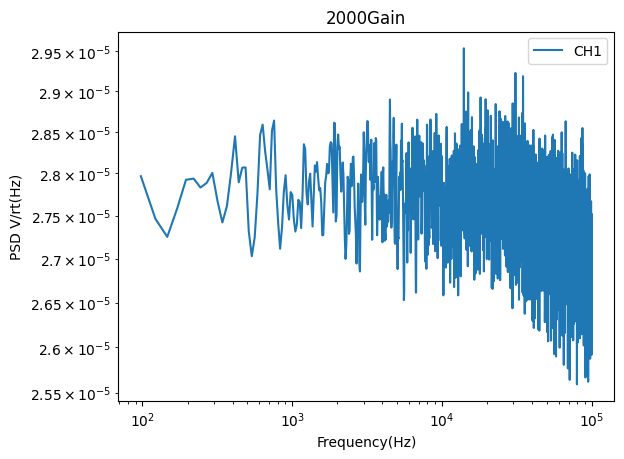

      Sample  Frequency(Hz)  Amplitude CH1(V/rt(Hz))  Amplitude CH2(V/rt(Hz))
0          0         1.0000                 0.018617                 0.000705
1          1        24.4141                 0.018617                 0.000705
2          2        48.8281                 0.005390                 0.000204
3          3        73.2422                 0.000452                 0.000018
4          4        97.6563                 0.000070                 0.000004
...      ...            ...                      ...                      ...
4091    4091     99877.9000                 0.000068                 0.000004
4092    4092     99902.3000                 0.000068                 0.000004
4093    4093     99926.8000                 0.000066                 0.000004
4094    4094     99951.2000                 0.000066                 0.000004
4095    4095     99975.6000                 0.000068                 0.000004

[4096 rows x 4 columns]


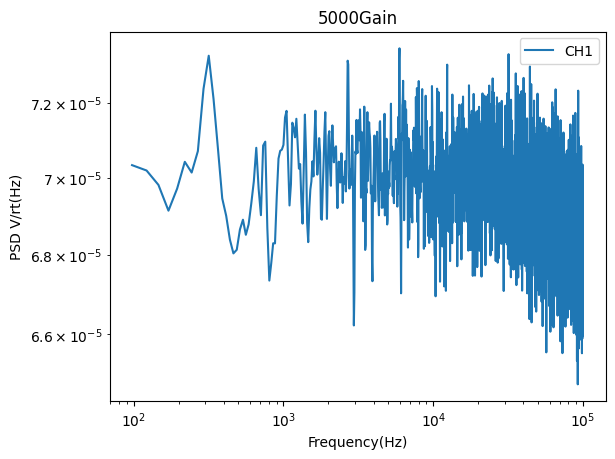

      Sample  Frequency(Hz)  Amplitude CH1(V/rt(Hz))  Amplitude CH2(V/rt(Hz))
0          0         1.0000                 0.031927                 0.000707
1          1        24.4141                 0.031927                 0.000707
2          2        48.8281                 0.009242                 0.000205
3          3        73.2422                 0.000777                 0.000017
4          4        97.6563                 0.000139                 0.000004
...      ...            ...                      ...                      ...
4091    4091     99877.9000                 0.000132                 0.000004
4092    4092     99902.3000                 0.000132                 0.000004
4093    4093     99926.8000                 0.000135                 0.000004
4094    4094     99951.2000                 0.000136                 0.000004
4095    4095     99975.6000                 0.000134                 0.000004

[4096 rows x 4 columns]


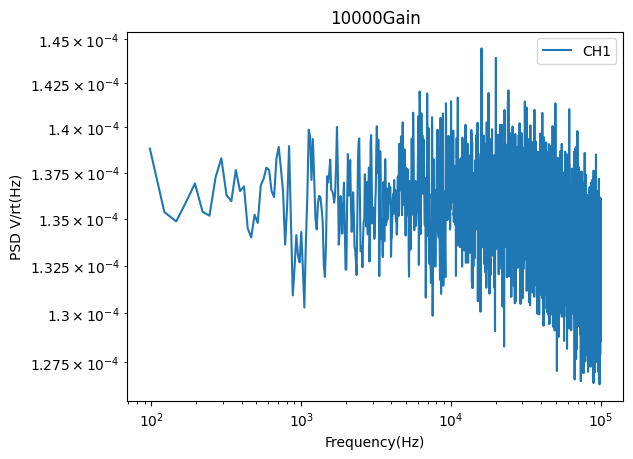

      Sample  Frequency(Hz)  Amplitude CH1(V/rt(Hz))  Amplitude CH2(V/rt(Hz))
0          0         1.0000                 0.055408                 0.000709
1          1        24.4141                 0.055408                 0.000709
2          2        48.8281                 0.016034                 0.000205
3          3        73.2422                 0.001346                 0.000018
4          4        97.6563                 0.000250                 0.000004
...      ...            ...                      ...                      ...
4091    4091     99877.9000                 0.000245                 0.000004
4092    4092     99902.3000                 0.000244                 0.000004
4093    4093     99926.8000                 0.000240                 0.000004
4094    4094     99951.2000                 0.000239                 0.000004
4095    4095     99975.6000                 0.000241                 0.000004

[4096 rows x 4 columns]


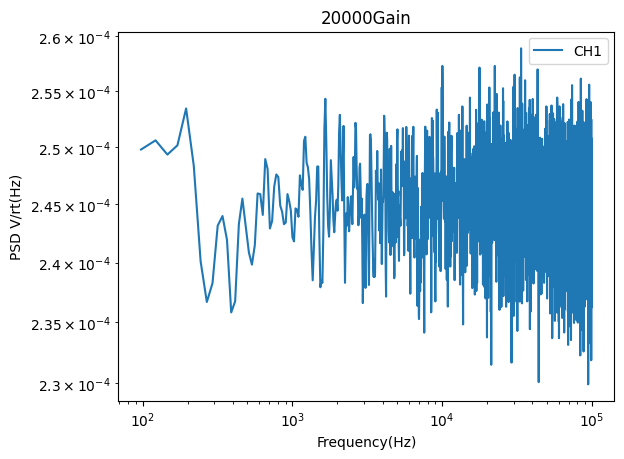

      Sample  Frequency(Hz)  Amplitude CH1(V/rt(Hz))  Amplitude CH2(V/rt(Hz))
0          0         1.0000                 0.129153                 0.000694
1          1        24.4141                 0.129153                 0.000694
2          2        48.8281                 0.037385                 0.000201
3          3        73.2422                 0.003148                 0.000017
4          4        97.6563                 0.000566                 0.000004
...      ...            ...                      ...                      ...
4091    4091     99877.9000                 0.000547                 0.000004
4092    4092     99902.3000                 0.000544                 0.000004
4093    4093     99926.8000                 0.000549                 0.000004
4094    4094     99951.2000                 0.000558                 0.000004
4095    4095     99975.6000                 0.000563                 0.000004

[4096 rows x 4 columns]


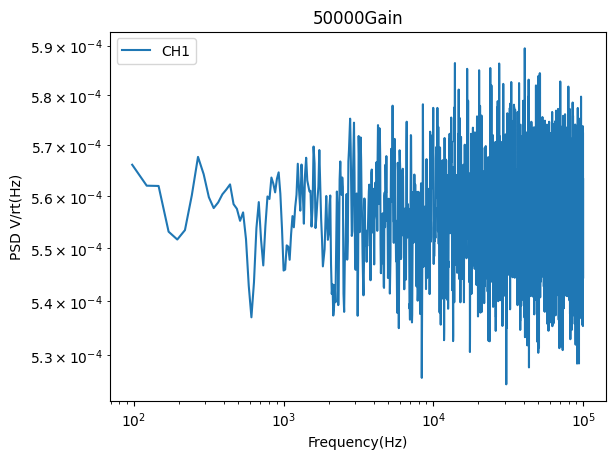

In [167]:
# Read in CSV for all gains for step 3
def load_files(folder):
    files = []
    for file in os.listdir(folder):
        if file.endswith('.csv') and file.startswith('Run'):
            files += [file]
    return files

m2k_gain_folder = f'{data_file_path}/Part_B'
m2k_gain_files = sorted(load_files(m2k_gain_folder))
print(m2k_gain_files)

# Holds dataframes for all the gain files

m2k_gain_frames = []
titles = []
for file in m2k_gain_files:
    m2k_gain_frames += [pd.read_csv(f'{m2k_gain_folder}/{file}')]
    temp_title = file[:-4]
    temp_title = temp_title[5:]
    temp_title = temp_title[:-10]
    titles += [temp_title]

print(titles)

# Index for titles
i = 0

# Plot frame data: NOTE: Channel 1 is included in the frames(?)
for frame in m2k_gain_frames:
    plt.figure()
    plt.xscale('log')
    plt.yscale('log')
    plt.title(titles[i])
    i += 1
    plt.ylabel('PSD V/rt(Hz)')
    plt.xlabel('Frequency(Hz)')
    plt.plot(frame['Frequency(Hz)'][4:], frame['Amplitude CH1(V/rt(Hz))'][4:], label='CH1')
    plt.legend()
    print(frame)
    plt.show()

In [168]:
# Take average for the PSD across the same interval of all gains. Only use Channel 2
m2k_gains_avgs = []

for frame in m2k_gain_frames:
    m2k_gains_avgs += [np.mean(frame['Amplitude CH1(V/rt(Hz))'][2500:])]

for i in range(len(titles)):
    print(f'Average PSD for {titles[i]} of M2k Channel 1: {m2k_gains_avgs[i]:.6E} V/rt(Hz)')

Average PSD for 100Gain of M2k Channel 1: 5.347624E-06 V/rt(Hz)
Average PSD for 200Gain of M2k Channel 1: 6.119258E-06 V/rt(Hz)
Average PSD for 500Gain of M2k Channel 1: 7.845357E-06 V/rt(Hz)
Average PSD for 1000Gain of M2k Channel 1: 1.576089E-05 V/rt(Hz)
Average PSD for 2000Gain of M2k Channel 1: 2.703074E-05 V/rt(Hz)
Average PSD for 5000Gain of M2k Channel 1: 6.841656E-05 V/rt(Hz)
Average PSD for 10000Gain of M2k Channel 1: 1.326017E-04 V/rt(Hz)
Average PSD for 20000Gain of M2k Channel 1: 2.437697E-04 V/rt(Hz)
Average PSD for 50000Gain of M2k Channel 1: 5.545246E-04 V/rt(Hz)


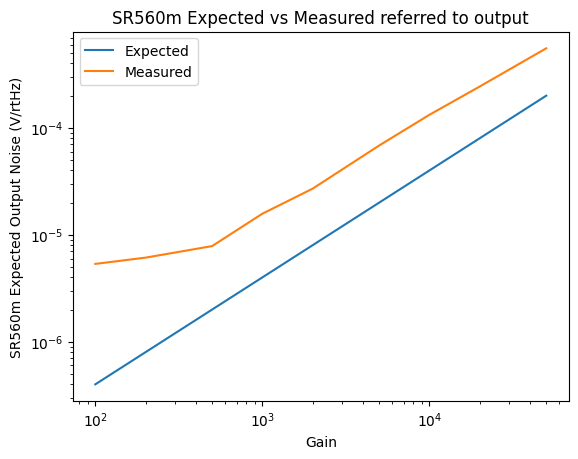

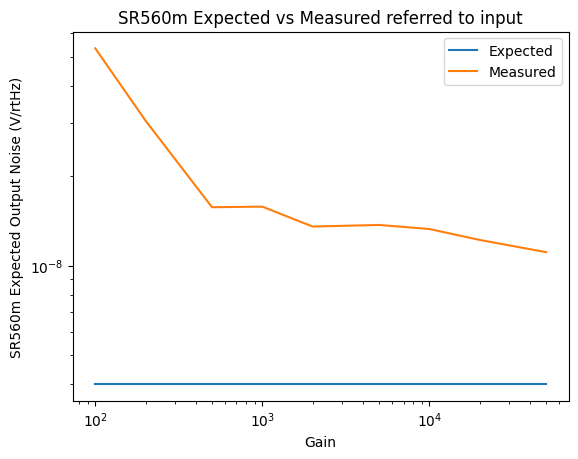

In [169]:
# Holds dataframes for all the plots
comparison_frames = []

# Read in CSV for step 11
comparison_frames += [pd.read_csv(f'{data_file_path}/Part_B/SR560ExpectedVsActualOutputReferred.csv')]
comparison_frames += [pd.read_csv(f'{data_file_path}/Part_B/SR560ExpectedVsActualInputReferred.csv')]

comparison_titles = ["SR560m Expected vs Measured referred to output", "SR560m Expected vs Measured referred to input"]

# Index for titles
i = 0

# Plot frame data: NOTE: Channel 1 is included in the frames(?)
for frame in comparison_frames:
#    print(frame)
    plt.figure()
    plt.xscale('log')
    plt.yscale('log')
    plt.title(comparison_titles[i])
    i += 1
    plt.ylabel('SR560m Expected Output Noise (V/rtHz)')
    plt.xlabel('Gain')
    plt.plot(frame['Gain'], frame['SR560m Expected Output Noise (V/rtHz)'], label='Expected')
    plt.plot(frame['Gain'], frame['SR560m Measured Output Noise (V/rtHz)'], label='Measured')
    plt.legend()
    plt.show()

# Part C: Measuring the PSD of an active circuit/device

## Parts required to include in the Team Report

### NEEDS COMPLETION
1) Prelab: From the UA741 datasheet, find the equivalent input noise voltage. At a gain of x20, what output voltage noise do you expect?

### NEED TO DECIDE ON INTERVAL FOR AVERAGE. PLOT SHOWS DECENT AREA AROUND 10^4 HZ VIA LOG SCALE
2) Measure and record/save the PSD of the x20 UA741 EB at x1 gain between 100 Hz and 100 kHz. Step through all the gain settings from x1 to x2000. Above a certain gain, the PSD values should be roughly linear in the gain.


For each run we used 

Exponential RMS

Blackman-Harris

100 Averages

24.41 Hz RBW

['Run01_UA741_gain1.csv', 'Run02_UA741_gain2.csv', 'Run03_UA741_gain5.csv', 'Run04_UA741_gain10.csv', 'Run05_UA741_gain20.csv', 'Run06_UA741_gain50.csv', 'Run07_UA741_gain100.csv', 'Run08_UA741_gain200.csv', 'Run09_UA741_gain500.csv', 'Run10_UA741_gain1000.csv', 'Run11_UA741_gain2000.csv', 'Run12_UA741_gain5000.csv']
[      Sample  Frequency(Hz)  Amplitude CH1(V/rt(Hz))  Amplitude CH2(V/rt(Hz))  \
0          0         1.0000                 0.006856                 0.000979   
1          1        24.4141                 0.006856                 0.000979   
2          2        48.8281                 0.001983                 0.000284   
3          3        73.2422                 0.000169                 0.000024   
4          4        97.6563                 0.000049                 0.000005   
...      ...            ...                      ...                      ...   
4091    4091     99877.9000                 0.000043                 0.000004   
4092    4092     99902.3000     

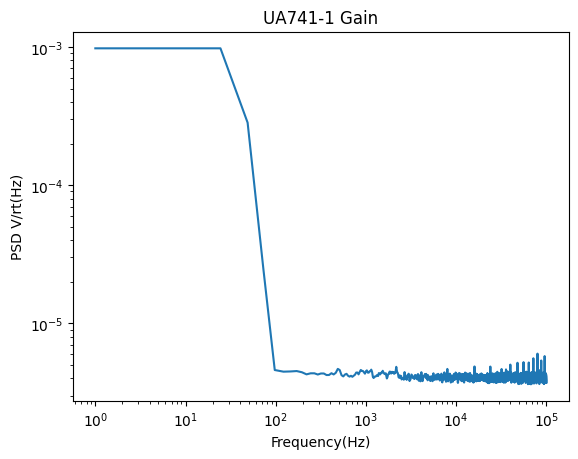

      Sample  Frequency(Hz)  Amplitude CH1(V/rt(Hz))  Amplitude CH2(V/rt(Hz))  \
0          0         1.0000                 0.007174                 0.001083   
1          1        24.4141                 0.007174                 0.001083   
2          2        48.8281                 0.002081                 0.000314   
3          3        73.2422                 0.000184                 0.000027   
4          4        97.6563                 0.000048                 0.000005   
...      ...            ...                      ...                      ...   
4091    4091     99877.9000                 0.000045                 0.000004   
4092    4092     99902.3000                 0.000045                 0.000004   
4093    4093     99926.8000                 0.000044                 0.000004   
4094    4094     99951.2000                 0.000040                 0.000004   
4095    4095     99975.6000                 0.000040                 0.000004   

             Title  
0     

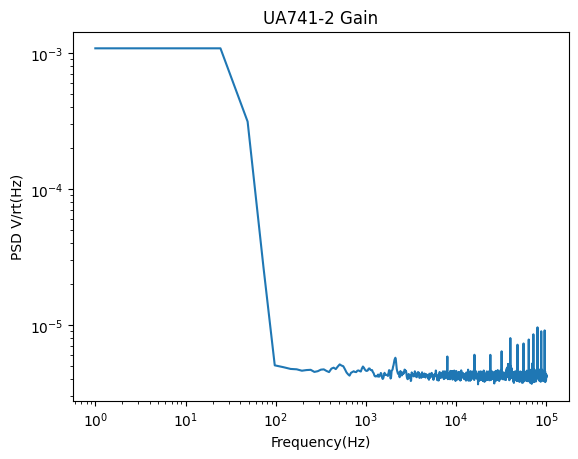

      Sample  Frequency(Hz)  Amplitude CH1(V/rt(Hz))  Amplitude CH2(V/rt(Hz))  \
0          0         1.0000                 0.007074                 0.001098   
1          1        24.4141                 0.007074                 0.001098   
2          2        48.8281                 0.002054                 0.000318   
3          3        73.2422                 0.000182                 0.000027   
4          4        97.6563                 0.000048                 0.000006   
...      ...            ...                      ...                      ...   
4091    4091     99877.9000                 0.000045                 0.000005   
4092    4092     99902.3000                 0.000044                 0.000005   
4093    4093     99926.8000                 0.000041                 0.000005   
4094    4094     99951.2000                 0.000042                 0.000005   
4095    4095     99975.6000                 0.000044                 0.000005   

             Title  
0     

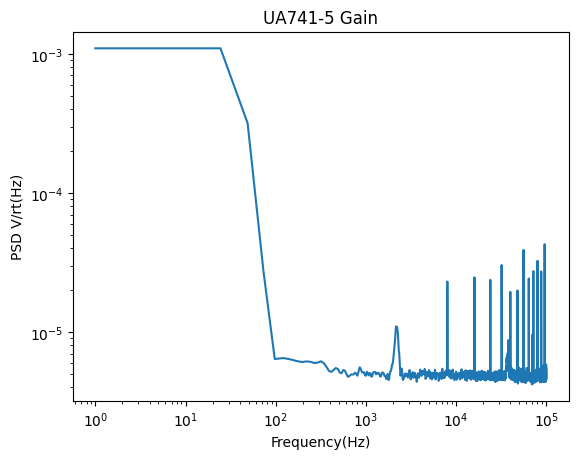

      Sample  Frequency(Hz)  Amplitude CH1(V/rt(Hz))  Amplitude CH2(V/rt(Hz))  \
0          0         1.0000                 0.007188                 0.001068   
1          1        24.4141                 0.007188                 0.001068   
2          2        48.8281                 0.002081                 0.000309   
3          3        73.2422                 0.000177                 0.000027   
4          4        97.6563                 0.000047                 0.000008   
...      ...            ...                      ...                      ...   
4091    4091     99877.9000                 0.000044                 0.000006   
4092    4092     99902.3000                 0.000041                 0.000006   
4093    4093     99926.8000                 0.000041                 0.000005   
4094    4094     99951.2000                 0.000042                 0.000006   
4095    4095     99975.6000                 0.000041                 0.000007   

              Title  
0    

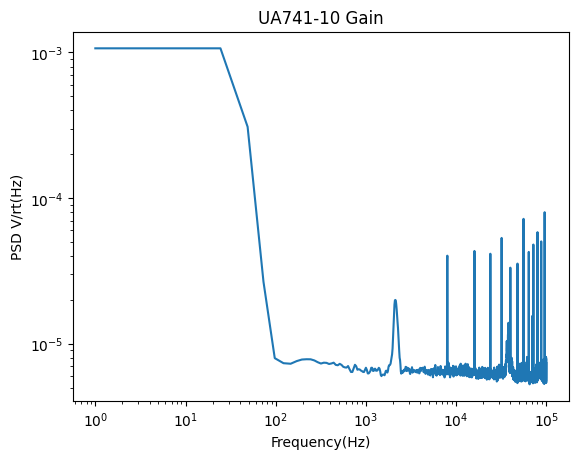

      Sample  Frequency(Hz)  Amplitude CH1(V/rt(Hz))  Amplitude CH2(V/rt(Hz))  \
0          0         1.0000                 0.007362                 0.001022   
1          1        24.4141                 0.007362                 0.001022   
2          2        48.8281                 0.002130                 0.000298   
3          3        73.2422                 0.000181                 0.000034   
4          4        97.6563                 0.000045                 0.000021   
...      ...            ...                      ...                      ...   
4091    4091     99877.9000                 0.000042                 0.000010   
4092    4092     99902.3000                 0.000042                 0.000010   
4093    4093     99926.8000                 0.000042                 0.000010   
4094    4094     99951.2000                 0.000041                 0.000010   
4095    4095     99975.6000                 0.000042                 0.000010   

              Title  
0    

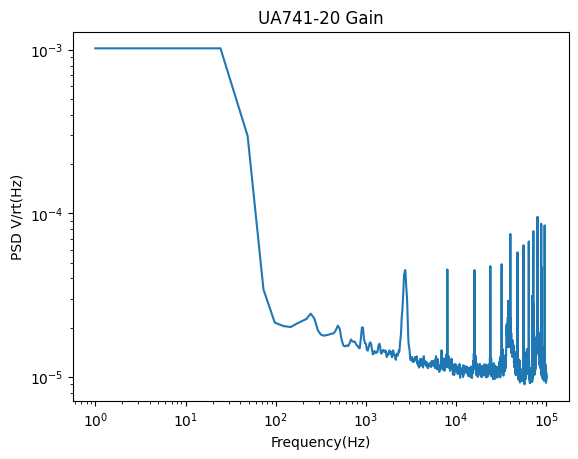

      Sample  Frequency(Hz)  Amplitude CH1(V/rt(Hz))  Amplitude CH2(V/rt(Hz))  \
0          0         1.0000                 0.007407                 0.000985   
1          1        24.4141                 0.007407                 0.000985   
2          2        48.8281                 0.002143                 0.000291   
3          3        73.2422                 0.000182                 0.000048   
4          4        97.6563                 0.000048                 0.000038   
...      ...            ...                      ...                      ...   
4091    4091     99877.9000                 0.000043                 0.000022   
4092    4092     99902.3000                 0.000044                 0.000022   
4093    4093     99926.8000                 0.000042                 0.000021   
4094    4094     99951.2000                 0.000043                 0.000023   
4095    4095     99975.6000                 0.000044                 0.000030   

              Title  
0    

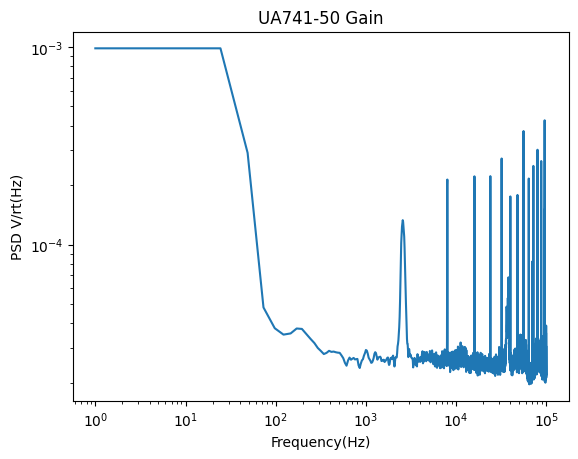

      Sample  Frequency(Hz)  Amplitude CH1(V/rt(Hz))  Amplitude CH2(V/rt(Hz))  \
0          0         1.0000                 0.007539                 0.001008   
1          1        24.4141                 0.007539                 0.001008   
2          2        48.8281                 0.002182                 0.000308   
3          3        73.2422                 0.000187                 0.000090   
4          4        97.6563                 0.000047                 0.000080   
...      ...            ...                      ...                      ...   
4091    4091     99877.9000                 0.000042                 0.000042   
4092    4092     99902.3000                 0.000042                 0.000041   
4093    4093     99926.8000                 0.000041                 0.000042   
4094    4094     99951.2000                 0.000041                 0.000042   
4095    4095     99975.6000                 0.000042                 0.000044   

               Title  
0   

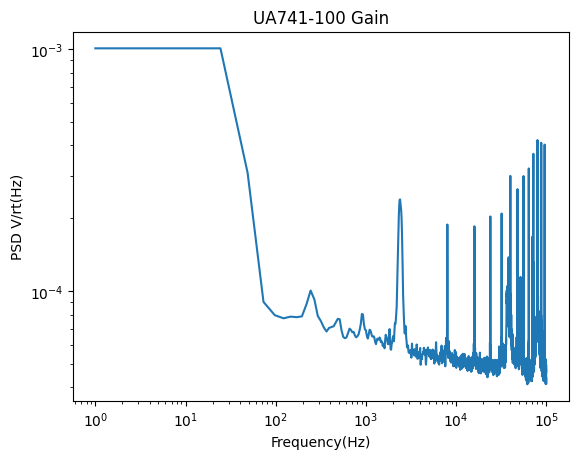

      Sample  Frequency(Hz)  Amplitude CH1(V/rt(Hz))  Amplitude CH2(V/rt(Hz))  \
0          0         1.0000                 0.007408                 0.001020   
1          1        24.4141                 0.007408                 0.001020   
2          2        48.8281                 0.002143                 0.000329   
3          3        73.2422                 0.000181                 0.000121   
4          4        97.6563                 0.000048                 0.000111   
...      ...            ...                      ...                      ...   
4091    4091     99877.9000                 0.000045                 0.000088   
4092    4092     99902.3000                 0.000043                 0.000087   
4093    4093     99926.8000                 0.000045                 0.000085   
4094    4094     99951.2000                 0.000046                 0.000084   
4095    4095     99975.6000                 0.000045                 0.000112   

               Title  
0   

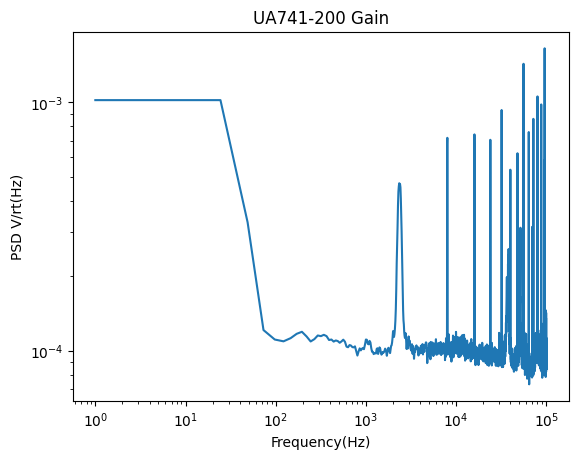

      Sample  Frequency(Hz)  Amplitude CH1(V/rt(Hz))  Amplitude CH2(V/rt(Hz))  \
0          0         1.0000                 0.007631                 0.001274   
1          1        24.4141                 0.007631                 0.001274   
2          2        48.8281                 0.002209                 0.000531   
3          3        73.2422                 0.000188                 0.000300   
4          4        97.6563                 0.000044                 0.000288   
...      ...            ...                      ...                      ...   
4091    4091     99877.9000                 0.000043                 0.000208   
4092    4092     99902.3000                 0.000043                 0.000211   
4093    4093     99926.8000                 0.000042                 0.000212   
4094    4094     99951.2000                 0.000043                 0.000210   
4095    4095     99975.6000                 0.000044                 0.000275   

               Title  
0   

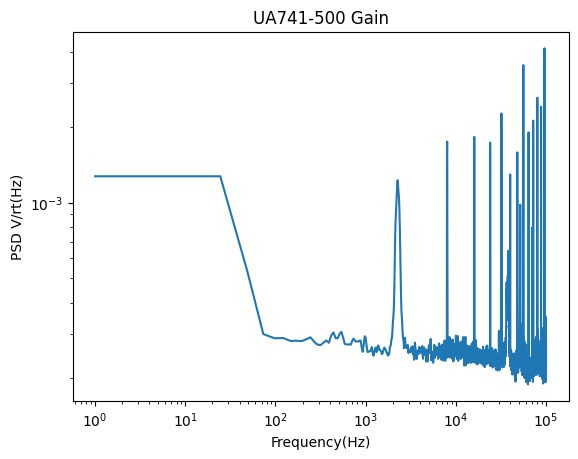

      Sample  Frequency(Hz)  Amplitude CH1(V/rt(Hz))  Amplitude CH2(V/rt(Hz))  \
0          0         1.0000                 0.007625                 0.002151   
1          1        24.4141                 0.007625                 0.002151   
2          2        48.8281                 0.002208                 0.000928   
3          3        73.2422                 0.000189                 0.000543   
4          4        97.6563                 0.000046                 0.000535   
...      ...            ...                      ...                      ...   
4091    4091     99877.9000                 0.000040                 0.000433   
4092    4092     99902.3000                 0.000042                 0.000419   
4093    4093     99926.8000                 0.000043                 0.000413   
4094    4094     99951.2000                 0.000044                 0.000423   
4095    4095     99975.6000                 0.000044                 0.000570   

                Title  
0  

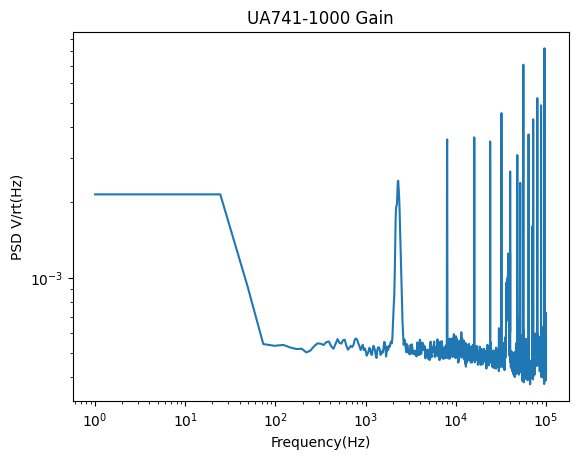

      Sample  Frequency(Hz)  Amplitude CH1(V/rt(Hz))  Amplitude CH2(V/rt(Hz))  \
0          0         1.0000                 0.007699                 0.047062   
1          1        24.4141                 0.007699                 0.047062   
2          2        48.8281                 0.002229                 0.013703   
3          3        73.2422                 0.000190                 0.001634   
4          4        97.6563                 0.000048                 0.001112   
...      ...            ...                      ...                      ...   
4091    4091     99877.9000                 0.000044                 0.000866   
4092    4092     99902.3000                 0.000045                 0.000832   
4093    4093     99926.8000                 0.000045                 0.000802   
4094    4094     99951.2000                 0.000045                 0.000856   
4095    4095     99975.6000                 0.000043                 0.001138   

                Title  
0  

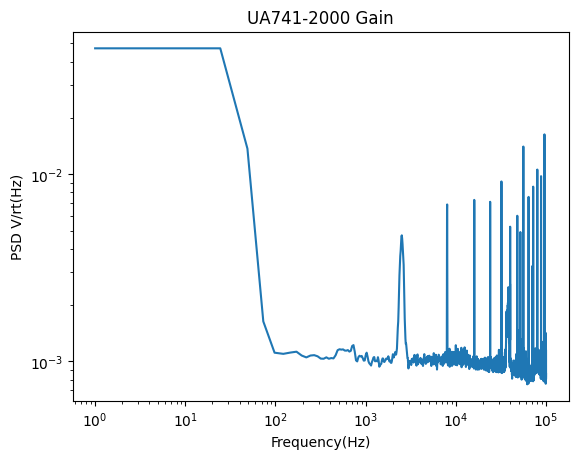

      Sample  Frequency(Hz)  Amplitude CH1(V/rt(Hz))  Amplitude CH2(V/rt(Hz))  \
0          0         1.0000                 0.007762                 0.008611   
1          1        24.4141                 0.007762                 0.008611   
2          2        48.8281                 0.002251                 0.003961   
3          3        73.2422                 0.000196                 0.002845   
4          4        97.6563                 0.000051                 0.002771   
...      ...            ...                      ...                      ...   
4091    4091     99877.9000                 0.000048                 0.002104   
4092    4092     99902.3000                 0.000050                 0.002209   
4093    4093     99926.8000                 0.000049                 0.002228   
4094    4094     99951.2000                 0.000046                 0.002239   
4095    4095     99975.6000                 0.000048                 0.002874   

                Title  
0  

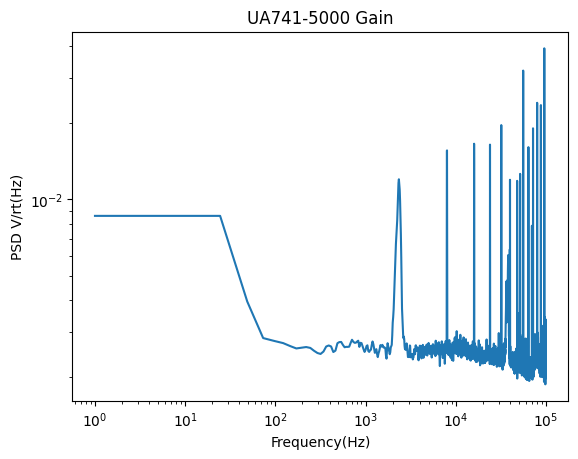

In [170]:
# Read in CSV for part 2

ua741_gain_folder = f'{data_file_path}/Part_C'
ua741_gain_files = sorted(load_files(ua741_gain_folder))
print(ua741_gain_files)

# Holds dataframes for all the gain files

ua741_gain_frames = []
titles = []
for file in ua741_gain_files:
    ua741_gain_frames += [pd.read_csv(f'{ua741_gain_folder}/{file}')]
    temp_title = file[:-4]
    temp_title = temp_title[12:]
    titles += [temp_title]
print(ua741_gain_frames)

for frame in ua741_gain_frames:
    plt.figure()
    plt.xscale('log')
    plt.yscale('log')
    plt.title(frame['Title'][0])
    plt.xlabel('Frequency(Hz)')
    plt.ylabel('PSD V/rt(Hz)')
    plt.plot(frame['Frequency(Hz)'], frame['Amplitude CH2(V/rt(Hz))'])
    print(frame)
    plt.show()

In [171]:
# Take average for the PSD across the same interval of all gains. Only use Channel 2
ua741_gains_avgs = []

for frame in ua741_gain_frames:
    ua741_gains_avgs += [np.mean(frame['Amplitude CH2(V/rt(Hz))'][332:655])]
print(ua741_gains_avgs)
print(titles)
for i in range(len(titles)):
    print(f'Average PSD for {titles[i]} of UA741: {ua741_gains_avgs[i]:.6E} V/rt(Hz)')

[np.float64(4.050599164086688e-06), np.float64(4.261856253869969e-06), np.float64(4.919068730650155e-06), np.float64(6.521970588235295e-06), np.float64(1.1210826160990711e-05), np.float64(2.606228978328173e-05), np.float64(5.1706338080495364e-05), np.float64(0.00010236484613003097), np.float64(0.00025599234365325074), np.float64(0.0005133731486068112), np.float64(0.0010314383281733745), np.float64(0.0025766720743034053)]
['gain1', 'gain2', 'gain5', 'gain10', 'gain20', 'gain50', 'gain100', 'gain200', 'gain500', 'gain1000', 'gain2000', 'gain5000']
Average PSD for gain1 of UA741: 4.050599E-06 V/rt(Hz)
Average PSD for gain2 of UA741: 4.261856E-06 V/rt(Hz)
Average PSD for gain5 of UA741: 4.919069E-06 V/rt(Hz)
Average PSD for gain10 of UA741: 6.521971E-06 V/rt(Hz)
Average PSD for gain20 of UA741: 1.121083E-05 V/rt(Hz)
Average PSD for gain50 of UA741: 2.606229E-05 V/rt(Hz)
Average PSD for gain100 of UA741: 5.170634E-05 V/rt(Hz)
Average PSD for gain200 of UA741: 1.023648E-04 V/rt(Hz)
Average P

# Part D: Characterize the PSD of high-performance opamp circuits

## Parts required for Team Report

1) Prelab: None

### PLOTS COMPLETE. NEED AVERAGES.

2) Characterize the SR1 device. Measure and save recordings. Spectrum represents the instrumental noise floor of the SR1. Measure both baseband 28.8 kHz and 1.562 kHz.


3) Perform measurements for each EB inside of the enclosure. Primary data of interest is the noise floor and the 1/f knee frequency. The secondary data for graduate students is the slope of the 1/f noise, to be determined from the saved data through regression. Convert the data to the input referred noise using the EB gain measured from lab 3 using resistor values.

## Device folders in base path

In [172]:
def load_files(folder):
    files = []
    for file in os.listdir(folder):
        if file.endswith('.TXT'):
            files += [file]
    return files

In [173]:
def device_frames_plots(base_path, device, device_files):
    for file in device_files:
        frame = pd.read_csv(f'{base_path}/{device}/{file}', sep=',')
        plt.figure()
        plt.xscale('log')
        plt.yscale('log')
        plt.title(f'{file}')
        plt.xlabel('Frequency(Hz)')
        plt.ylabel('V/rt(Hz)')
        plt.plot(frame['frequency(Hz)'], frame['V/rt(Hz)'])
        print(frame)
        plt.show()

### Load only the text files from each device

In [174]:
part_d_data_path = data_file_path + '/Part_D'

ADA4898_files = load_files(f'{part_d_data_path}/ADA4898-1')
AD797_files = load_files(f'{part_d_data_path}/AD797')
AD848_files = load_files(f'{part_d_data_path}/AD848')
LMH6624_files = load_files(f'{part_d_data_path}/LMH6624')
SR1_files = load_files(f'{part_d_data_path}/SR1')
print(ADA4898_files)
print(AD797_files)
print(AD848_files)
print(LMH6624_files)
print(SR1_files)

['ADA4898-1_1-5625_kHzSpan_125Avg_4kRes.TXT', 'ADA4898-1_28_8_kHzSpan_200Avg_32kRes.TXT', 'ADA4898-1_390-62_HzSpan_100Avg_1kRes.TXT']
['AD797_1KhzSpan_250Avg_16kRes.TXT', 'AD797_28_8_KhzSpan_1000Avg_8kRes.TXT']
['AD848_15625_kHzSpan_100Avg_8kRes.TXT', 'AD848_28_8_kHzSpan_100Avg_16kRes.TXT', 'AD848_28_8_kHzSpan_250Avg_16kRes.TXT', 'AD848_39062_HzSpan_100Avg_2kRes.TXT']
['LMH6624_200_kHzSpan_1000Avg_32kRes_HiBW.TXT', 'LMH6624_28_8_kHzSpan_200Avg_32kRes.TXT']
['SR1_15625_kHzSpan_50Avg_32kRes_HiRes.TXT', 'SR1_1KhzSpan_1000Avg_2kres.TXT', 'SR1_1KhzSpan_1000Avg_32K_res.TXT', 'SR1_200_kHzSpan_1000Avg_32kRes_HiBW.TXT', 'SR1_28-8_kHzSpan_1000Avg_32kRes_HiRes.TXT', 'SR1_28-8_kHzSpan_UnkAvg_32kRes_HiRes.TXT']


       frequency(Hz)      V/rt(Hz)
0           0.000000  1.955738e-07
1           0.122070  2.095028e-07
2           0.244141  2.231958e-07
3           0.366211  2.276761e-07
4           0.488281  2.133732e-07
...              ...           ...
12795    1561.889648  1.801913e-08
12796    1562.011719  2.002256e-08
12797    1562.133789  2.148501e-08
12798    1562.255859  2.153734e-08
12799    1562.377930  2.108017e-08

[12800 rows x 2 columns]


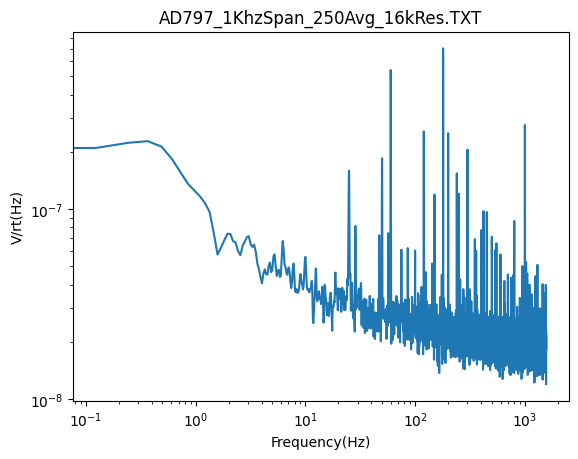

      frequency(Hz)      V/rt(Hz)
0          0.000000  8.035845e-08
1          3.906144  9.260192e-08
2          7.812288  9.536783e-08
3         11.718432  8.129840e-08
4         15.624576  6.984370e-08
...             ...           ...
7368   28780.469280  1.802127e-08
7369   28784.375424  1.788948e-08
7370   28788.281568  1.808030e-08
7371   28792.187712  1.795645e-08
7372   28796.093856  1.782864e-08

[7373 rows x 2 columns]


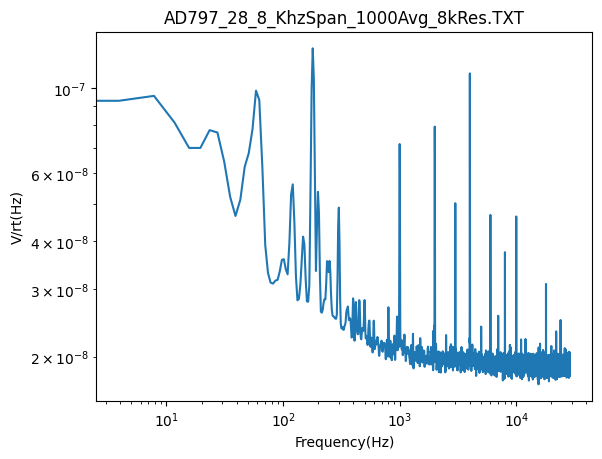

      frequency(Hz)      V/rt(Hz)
0          0.000000  6.206788e-07
1          0.244141  6.285524e-07
2          0.488281  5.729016e-07
3          0.732422  4.504984e-07
4          0.976562  3.477292e-07
...             ...           ...
6395    1561.279297  5.895332e-08
6396    1561.523438  5.582758e-08
6397    1561.767578  5.209892e-08
6398    1562.011719  5.256458e-08
6399    1562.255859  5.478079e-08

[6400 rows x 2 columns]


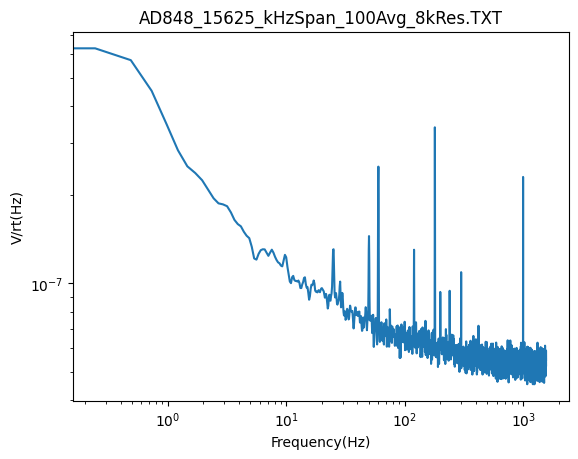

       frequency(Hz)      V/rt(Hz)
0           0.000000  1.819282e-07
1           1.953072  1.801559e-07
2           3.906144  1.598782e-07
3           5.859216  1.308337e-07
4           7.812288  1.113449e-07
...              ...           ...
14741   28790.234640  5.046177e-08
14742   28792.187712  4.815849e-08
14743   28794.140784  4.695479e-08
14744   28796.093856  4.709614e-08
14745   28798.046928  5.022099e-08

[14746 rows x 2 columns]


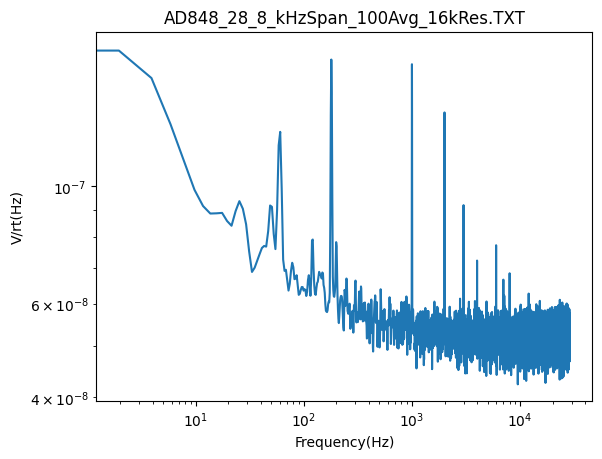

       frequency(Hz)      V/rt(Hz)
0           0.000000  1.722664e-07
1           1.953072  1.821465e-07
2           3.906144  1.783353e-07
3           5.859216  1.548347e-07
4           7.812288  1.349584e-07
...              ...           ...
14741   28790.234640  5.369937e-08
14742   28792.187712  5.337692e-08
14743   28794.140784  5.223043e-08
14744   28796.093856  5.096970e-08
14745   28798.046928  5.065806e-08

[14746 rows x 2 columns]


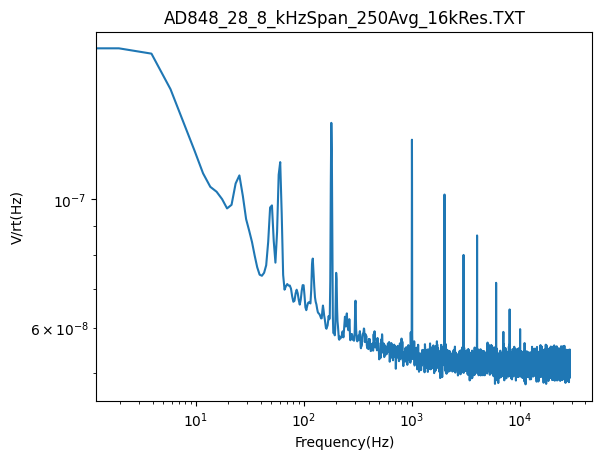

      frequency(Hz)      V/rt(Hz)
0          0.000000  5.969416e-07
1          0.244141  6.184902e-07
2          0.488281  5.786883e-07
3          0.732422  4.717889e-07
4          0.976562  3.842793e-07
...             ...           ...
1595     389.404297  5.936764e-08
1596     389.648438  5.829177e-08
1597     389.892578  5.794827e-08
1598     390.136719  5.675222e-08
1599     390.380859  5.582138e-08

[1600 rows x 2 columns]


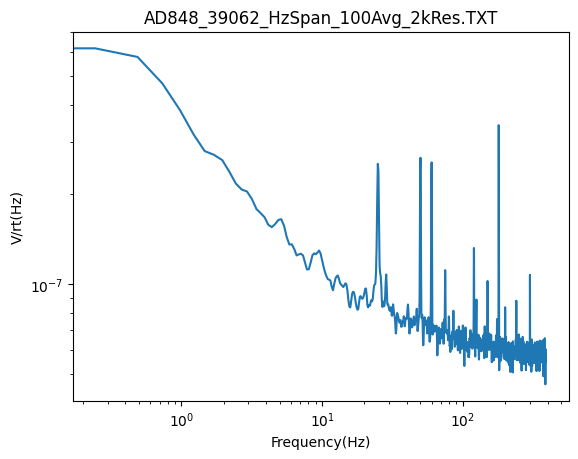

      frequency(Hz)      V/rt(Hz)
0          0.000000  4.531173e-08
1          0.488281  4.605012e-08
2          0.976562  4.310232e-08
3          1.464844  3.718763e-08
4          1.953125  3.348369e-08
...             ...           ...
3195    1560.058594  1.328783e-08
3196    1560.546875  1.295981e-08
3197    1561.035156  1.304531e-08
3198    1561.523438  1.374047e-08
3199    1562.011719  1.419210e-08

[3200 rows x 2 columns]


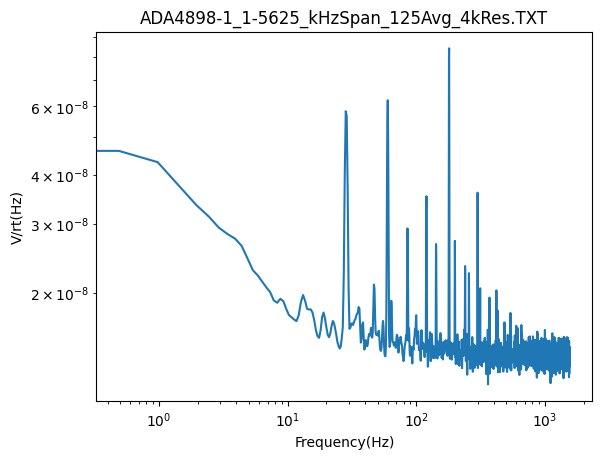

       frequency(Hz)      V/rt(Hz)
0           0.000000  3.147277e-08
1           0.976569  3.413204e-08
2           1.953138  3.449991e-08
3           2.929707  3.010161e-08
4           3.906276  2.600716e-08
...              ...           ...
29486   28795.117154  1.439749e-08
29487   28796.093724  1.439575e-08
29488   28797.070293  1.420099e-08
29489   28798.046862  1.401691e-08
29490   28799.023431  1.391027e-08

[29491 rows x 2 columns]


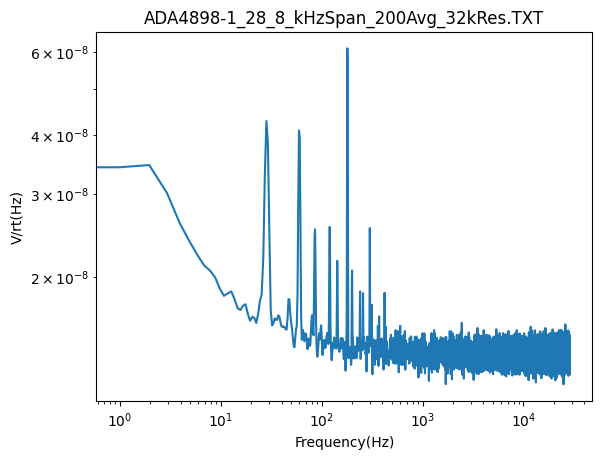

     frequency(Hz)      V/rt(Hz)
0         0.000000  4.499199e-08
1         0.488281  4.930813e-08
2         0.976562  4.945025e-08
3         1.464844  4.192863e-08
4         1.953125  3.558018e-08
..             ...           ...
795     388.183594  1.439556e-08
796     388.671875  1.381771e-08
797     389.160156  1.368385e-08
798     389.648438  1.379353e-08
799     390.136719  1.363375e-08

[800 rows x 2 columns]


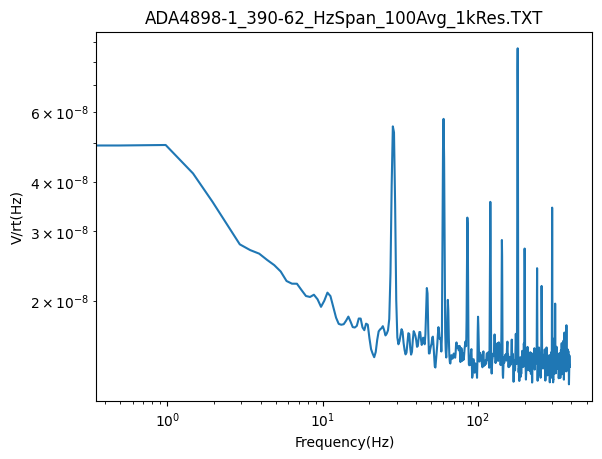

       frequency(Hz)      V/rt(Hz)
0             0.0000  1.160010e-06
1             7.8125  1.223901e-06
2            15.6250  1.214648e-06
3            23.4375  1.078159e-06
4            31.2500  9.321698e-07
...              ...           ...
25595    199960.9375  1.319354e-07
25596    199968.7500  1.322430e-07
25597    199976.5625  1.323283e-07
25598    199984.3750  1.338248e-07
25599    199992.1875  1.344425e-07

[25600 rows x 2 columns]


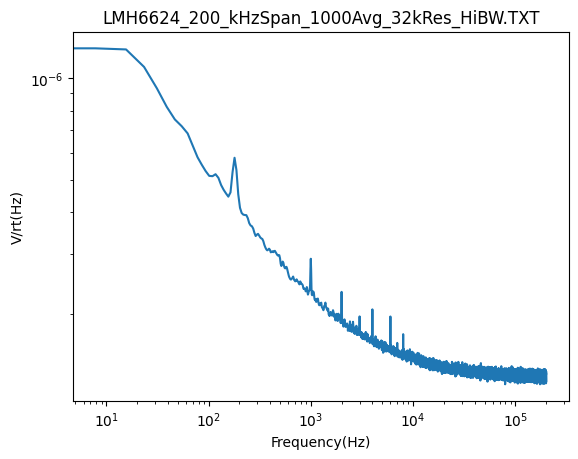

       frequency(Hz)      V/rt(Hz)
0           0.000000  3.451224e-06
1           0.976569  3.628247e-06
2           1.953138  3.476853e-06
3           2.929707  2.876775e-06
4           3.906276  2.392734e-06
...              ...           ...
29486   28795.117154  1.328570e-07
29487   28796.093724  1.309107e-07
29488   28797.070293  1.348497e-07
29489   28798.046862  1.394861e-07
29490   28799.023431  1.377418e-07

[29491 rows x 2 columns]


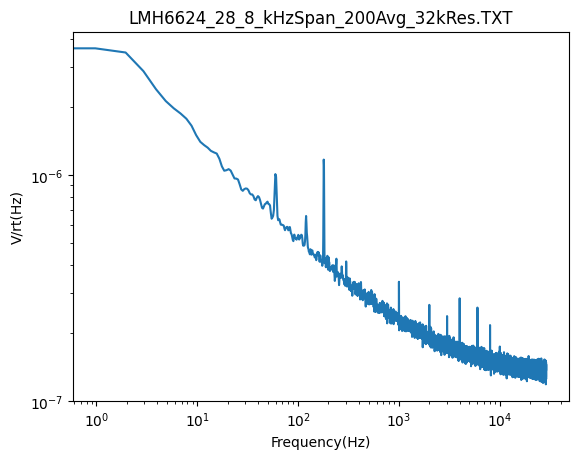

       frequency(Hz)      V/rt(Hz)
0           0.000000  8.741163e-08
1           0.061035  9.197381e-08
2           0.122070  8.678101e-08
3           0.183105  6.976407e-08
4           0.244141  5.619680e-08
...              ...           ...
25595    1562.194824  4.928005e-09
25596    1562.255859  4.862711e-09
25597    1562.316895  4.886845e-09
25598    1562.377930  4.830881e-09
25599    1562.438965  4.812365e-09

[25600 rows x 2 columns]


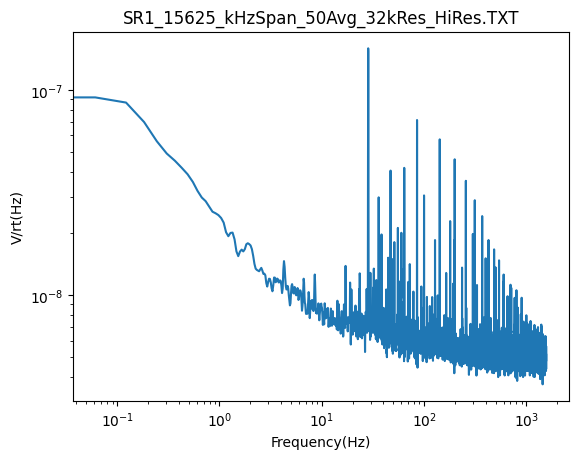

     frequency(Hz)      V/rt(Hz)
0         0.000000  1.147450e-08
1         1.953125  1.201521e-08
2         3.906250  1.158086e-08
3         5.859375  1.012013e-08
4         7.812500  9.160393e-09
..             ...           ...
795    1552.734375  5.102523e-09
796    1554.687500  5.131900e-09
797    1556.640625  5.200792e-09
798    1558.593750  5.227288e-09
799    1560.546875  5.240120e-09

[800 rows x 2 columns]


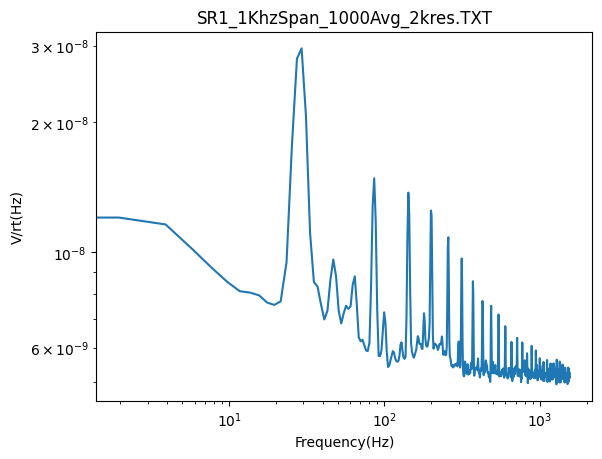

       frequency(Hz)      V/rt(Hz)
0           0.000000  7.221221e-08
1           0.061035  7.955561e-08
2           0.122070  7.483660e-08
3           0.183105  5.672883e-08
4           0.244141  4.592252e-08
...              ...           ...
25595    1562.194824  5.495732e-09
25596    1562.255859  5.742515e-09
25597    1562.316895  5.716823e-09
25598    1562.377930  5.084503e-09
25599    1562.438965  4.481484e-09

[25600 rows x 2 columns]


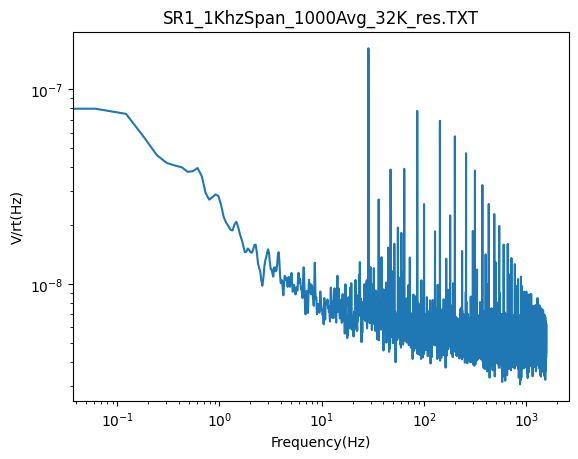

       frequency(Hz)      V/rt(Hz)
0             0.0000  1.666155e-08
1             7.8125  1.725963e-08
2            15.6250  1.800581e-08
3            23.4375  1.868041e-08
4            31.2500  1.895571e-08
...              ...           ...
25595    199960.9375  6.165673e-09
25596    199968.7500  6.308138e-09
25597    199976.5625  6.268647e-09
25598    199984.3750  6.118102e-09
25599    199992.1875  6.043676e-09

[25600 rows x 2 columns]


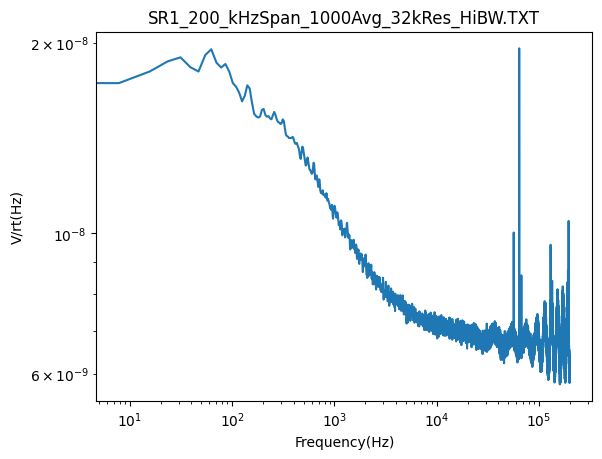

       frequency(Hz)      V/rt(Hz)
0           0.000000  1.736524e-08
1           0.976569  1.819981e-08
2           1.953138  1.750746e-08
3           2.929707  1.466949e-08
4           3.906276  1.226777e-08
...              ...           ...
29486   28795.117154  4.927559e-09
29487   28796.093724  4.911361e-09
29488   28797.070293  4.896353e-09
29489   28798.046862  4.850497e-09
29490   28799.023431  4.831894e-09

[29491 rows x 2 columns]


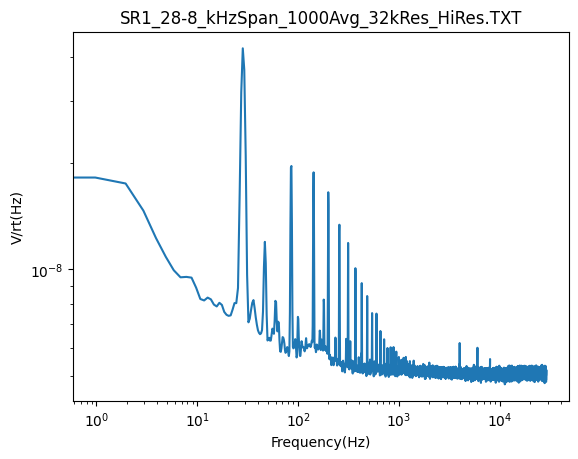

       frequency(Hz)      V/rt(Hz)
0           0.000000  1.736524e-08
1           0.976569  1.819981e-08
2           1.953138  1.750746e-08
3           2.929707  1.466949e-08
4           3.906276  1.226777e-08
...              ...           ...
29486   28795.117154  4.927559e-09
29487   28796.093724  4.911361e-09
29488   28797.070293  4.896353e-09
29489   28798.046862  4.850497e-09
29490   28799.023431  4.831894e-09

[29491 rows x 2 columns]


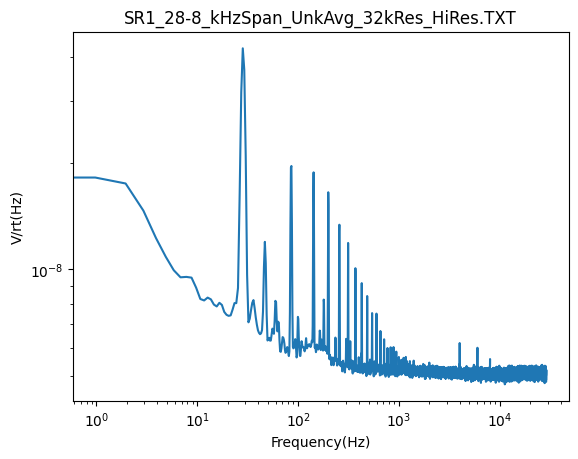

In [175]:
devices = ['AD797', 'AD848', 'ADA4898-1', 'LMH6624', 'SR1']
device_files = [AD797_files, AD848_files, ADA4898_files, LMH6624_files, SR1_files]

for i in range(len(devices)):
    device_frames_plots(part_d_data_path, devices[i], device_files[i])